In [3]:
from src.model import lgbm_train, xgb_train
import pandas as pd
import numpy as np
from src.preprocess import utils
import importlib

# Load data

In [4]:
df = pd.read_csv('data/Variant III.csv')
df = df.reset_index().rename(columns={'index': 'id'})
df.head()

,id,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,...,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,x1,x2
0,0,0,0.2,0.369510,326,20,60,0.022212,-0.758101,AB,...,0,INTERNET,19.450933,other,1,2,0,3,-0.282223,-0.137122
1,1,0,0.6,0.858929,-1,154,50,0.038221,-0.781645,AB,...,0,INTERNET,3.641099,windows,1,1,0,5,-0.145247,1.614553
2,2,0,0.9,0.166457,-1,41,50,0.002588,17.710636,AA,...,0,INTERNET,3.850864,macintosh,0,1,0,4,-0.029179,1.089166
3,3,0,0.8,0.250290,23,9,50,0.004026,18.224113,AA,...,0,INTERNET,5.182197,windows,1,1,0,2,2.178365,1.301696
4,4,0,0.1,0.619087,-1,30,30,0.011687,-1.434154,AB,...,0,INTERNET,4.346861,windows,1,1,0,7,1.472099,0.367675


# Model

In [4]:
month_pred = 6

### LGBM

In [5]:
import importlib

importlib.reload(lgbm_train)
importlib.reload(utils)

<module 'src.preprocess.utils' from '\\\\mac\\Home\\Downloads\\BankDemo\\src\\preprocess\\utils.py'>

Number of finished trials: 1
Best params {'n_estimators': 7656, 'reg_alpha': 7.321999682506718, 'reg_lambda': 8.025172657533366, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 0.011767347690740606, 'max_depth': 50, 'num_leaves': 982, 'min_child_samples': 202, 'min_data_per_groups': 52}
Fold 0 recall: 0.7529976019184652
Fold 1 recall: 0.7565947242206235
Mean TPR on infer set: 0.7547961630695443


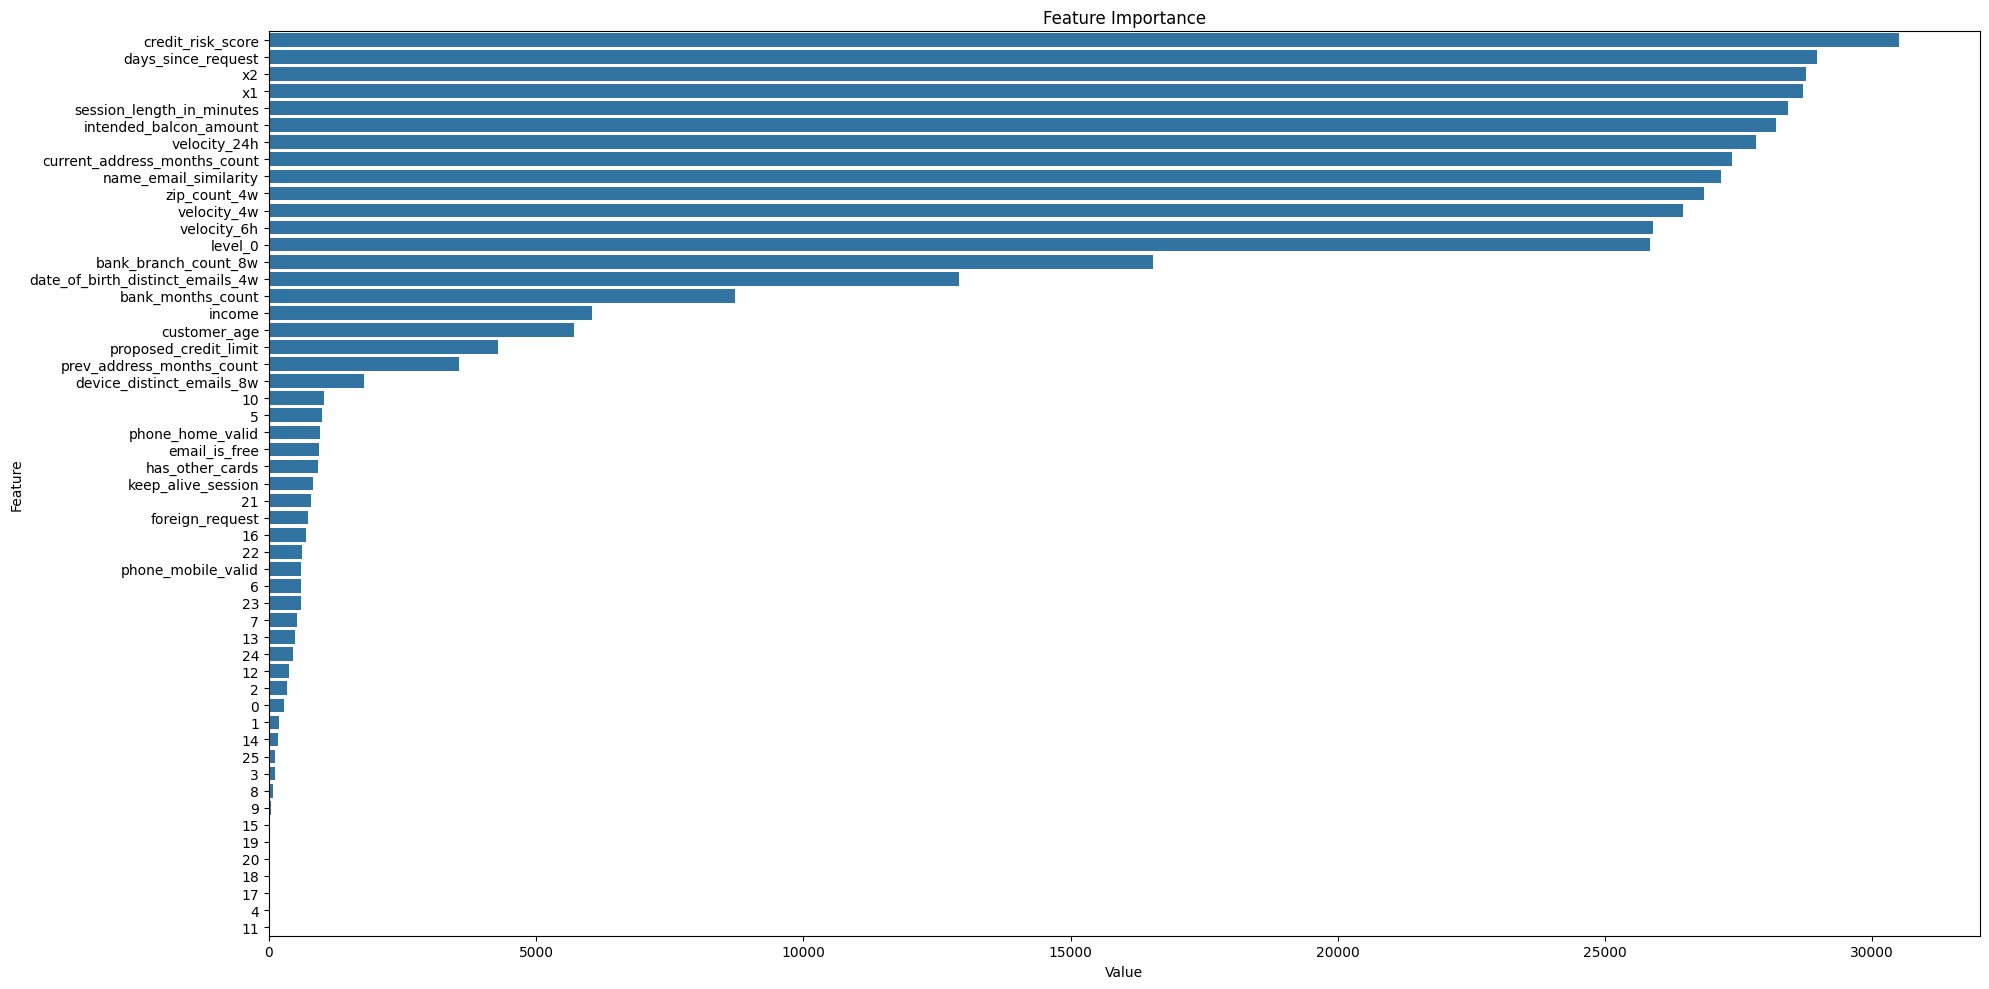

Default Threshold
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.99      1.00      1.00    134424
       Fraud       0.87      0.36      0.51      1668

    accuracy                           0.99    136092
   macro avg       0.93      0.68      0.75    136092
weighted avg       0.99      0.99      0.99    136092

Target Threshold @ 0.03
**************************************************
              precision    recall  f1-score   support

    No Fraud       1.00      0.95      0.97    134424
       Fraud       0.16      0.76      0.27      1668

    accuracy                           0.95    136092
   macro avg       0.58      0.86      0.62    136092
weighted avg       0.99      0.95      0.96    136092



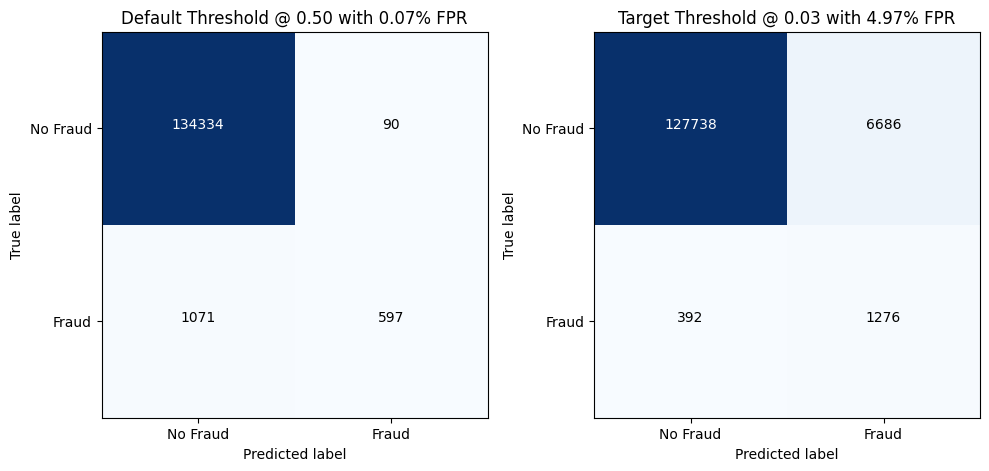

In [6]:
lgbm = lgbm_train.LGBMModel()
result_lgb = lgbm.fit(df, month_pred=month_pred)

In [7]:
result_lgb.head()

,level_0,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,20,21,22,23,24,25,y_true,y_pred,y_prob,month
0,7,0.2,0.923498,-1,286,30,0.034601,-1.409049,1553,2222.416714,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.000016,6
1,15,0.4,0.995646,-1,96,40,0.010179,-1.359216,839,3638.135788,...,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.000209,6
2,25,0.6,0.158382,-1,55,50,0.002294,-1.655350,977,2532.578792,...,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.003067,6
3,40,0.7,0.132907,109,10,40,0.000193,50.550458,664,1876.236743,...,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.000071,6
4,43,0.8,0.149156,-1,271,50,0.020824,51.109022,3365,1771.273486,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.003308,6


In [12]:
result_lgb.to_csv('result_lgb.csv', index=None)

### XGBoost

In [8]:
importlib.reload(xgb_train)

<module 'src.model.xgb_train' from '\\\\mac\\Home\\Downloads\\BankDemo\\src\\model\\xgb_train.py'>

Number of finished trials: 1
Fold 0 recall: 0.7398081534772182
Fold 1 recall: 0.7470023980815348
Mean TPR on infer set: 0.7434052757793765


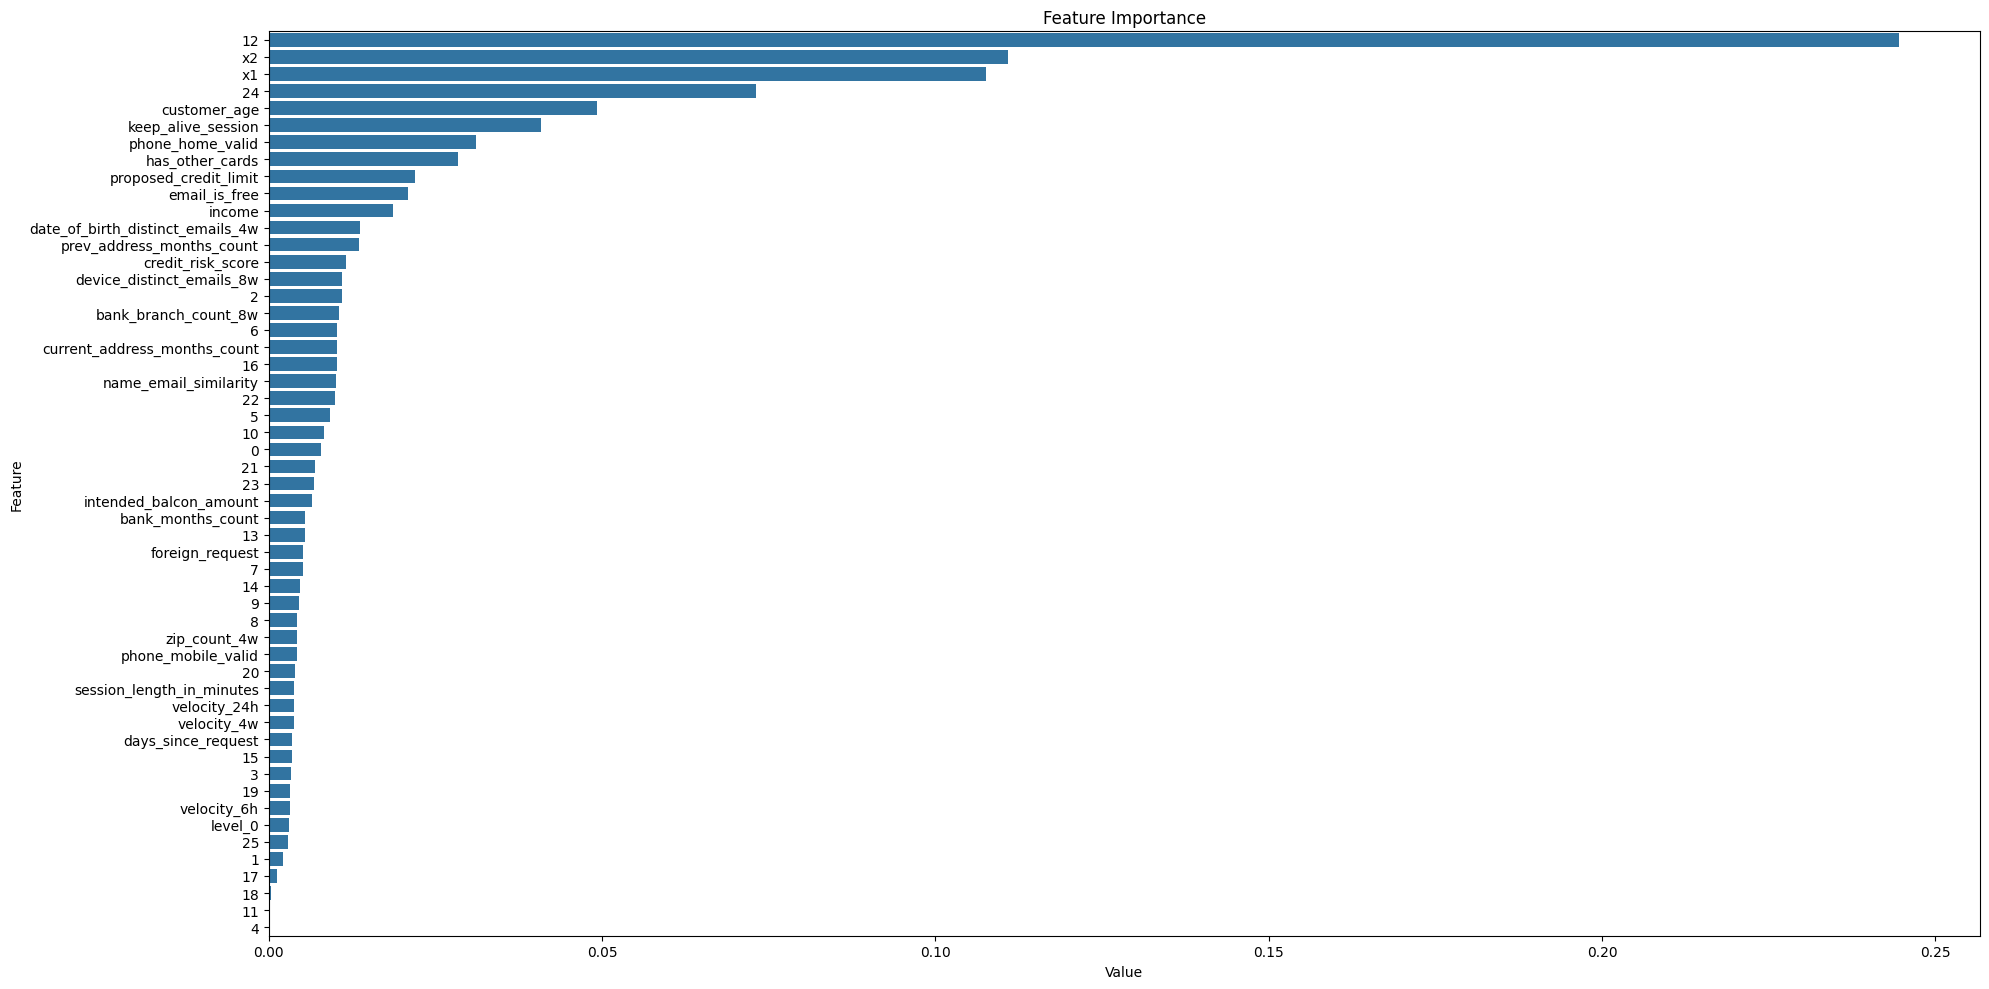

Default Threshold
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.99      1.00      1.00    134424
       Fraud       0.88      0.34      0.49      1668

    accuracy                           0.99    136092
   macro avg       0.94      0.67      0.74    136092
weighted avg       0.99      0.99      0.99    136092

Target Threshold @ 0.03
**************************************************
              precision    recall  f1-score   support

    No Fraud       1.00      0.95      0.97    134424
       Fraud       0.16      0.74      0.26      1668

    accuracy                           0.95    136092
   macro avg       0.58      0.85      0.61    136092
weighted avg       0.99      0.95      0.96    136092



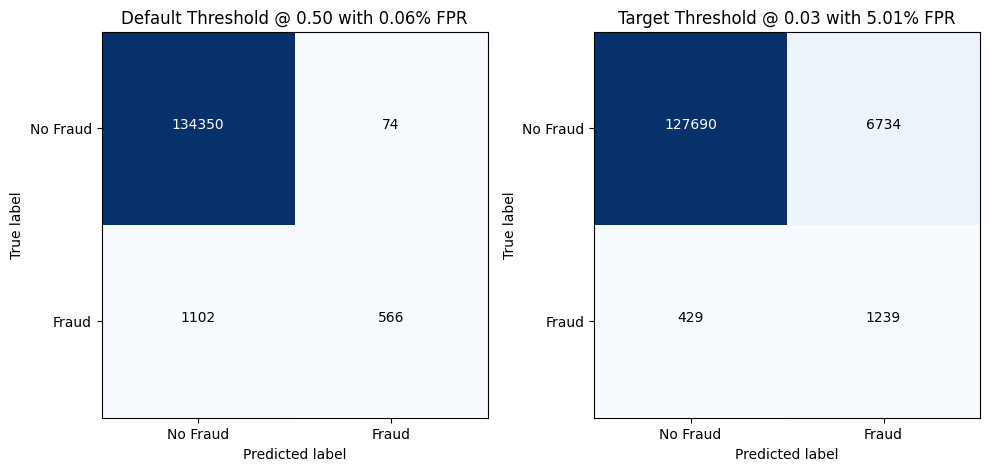

In [9]:
xgb = xgb_train.XGBoostModel()
result_xgb = xgb.fit(df, month_pred=month_pred)

In [10]:
result_xgb.head()

,level_0,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,20,21,22,23,24,25,y_true,y_pred,y_prob,month
0,7,0.2,0.923498,-1,286,30,0.034601,-1.409049,1553,2222.416714,...,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.001872,6
1,15,0.4,0.995646,-1,96,40,0.010179,-1.359216,839,3638.135788,...,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.004849,6
2,25,0.6,0.158382,-1,55,50,0.002294,-1.655350,977,2532.578792,...,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.003291,6
3,40,0.7,0.132907,109,10,40,0.000193,50.550458,664,1876.236743,...,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.002301,6
4,43,0.8,0.149156,-1,271,50,0.020824,51.109022,3365,1771.273486,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.008675,6


In [11]:
result_xgb.to_csv('result_xgb.csv', index=None)

### Ensemble

In [18]:
result_df = pd.merge(result_lgb, result_xgb, on='id', how='left', suffixes=['_lgbm', '_xgb'])
result_df.to_csv('result.csv', index=None)
result_df.head()

,level_0,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,23,24,25,y_true_x,y_pred_x,y_prob_x,month,y_true_y,y_pred_y,y_prob_y
0,7,0.2,0.923498,-1,286,30,0.034601,-1.409049,1553,2222.416714,...,1.0,0.0,0.0,0,0,0.000016,6,0,0,0.001872
1,15,0.4,0.995646,-1,96,40,0.010179,-1.359216,839,3638.135788,...,0.0,0.0,0.0,0,0,0.000209,6,0,0,0.004849
2,25,0.6,0.158382,-1,55,50,0.002294,-1.655350,977,2532.578792,...,0.0,0.0,0.0,0,0,0.003067,6,0,0,0.003291
3,40,0.7,0.132907,109,10,40,0.000193,50.550458,664,1876.236743,...,0.0,0.0,0.0,0,0,0.000071,6,0,0,0.002301
4,43,0.8,0.149156,-1,271,50,0.020824,51.109022,3365,1771.273486,...,0.0,1.0,0.0,0,0,0.003308,6,0,0,0.008675
